<a href="https://colab.research.google.com/github/oluwadamilola/Topic-Modelling/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.

singnal financial news dataset -

#import Libraries

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 

In [ ]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# The Data Preprocessing

*   cnbc data was used because there is a limited resource on colab to handle large data




In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/cnbc_headlines.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
#df.content = df.content.str.replace("[^A-Za-z ]", " ")

data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2                                                NaN   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2                             NaN   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
2                                                NaN  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...

In [ ]:
#drop NAN values
data = data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   
5  Wall Street delivered the 'kind of pullback I'...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   
5   7:36  PM ET Thu, 16 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...  
5  "Look for the stocks of high-quality companies...

In [ ]:
documents = data['Description'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clean_documents = [re.sub(r'[^a-zA-Z0-9\s]', '', document) for document in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Text preprocessing


*   most of the topics are in content and title
*   



# Tokenize words and cleanup the text

In [ ]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Remove stop words
stop_words = set(stopwords.words("english"))
filtered_documents = []
for document in clean_documents:
    tokens = word_tokenize(document.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_documents.append(" ".join(filtered_tokens))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tokenize the text data
tokenized_data = [document.split() for document in filtered_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#create Dictionary

In [ ]:
tokenized_documents = [document.split() for document in filtered_documents]
dictionary = corpora.Dictionary(tokenized_documents)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(2, 1), (5, 1), (6, 1), (7, 1), (8, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(1, 1), (2, 1), (11, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(13, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(1, 1), (5, 1), (7, 1), (8, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(2, 1), (5, 1), (6, 1), (7, 1), (8, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(33, 1), (40, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(1, 1), (77, 1), (78

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Build LDA Model

In [ ]:
from gensim import models
# Running LDA
num_topics = 10  # Specify the desired number of topics
lda_model = gensim.models.LdaModel(
    doc_term_matrix,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print("Topic", topic_id, ":", topic_words)

Topic 0 : 0.022*"jim" + 0.022*"cramer" + 0.020*"takes" + 0.018*"day" + 0.018*"calls" + 0.016*"picks" + 0.015*"stock" + 0.013*"percent" + 0.012*"thoughts" + 0.010*"says"
Topic 1 : 0.057*"jim" + 0.057*"cramer" + 0.015*"stock" + 0.015*"stocks" + 0.012*"charts" + 0.011*"technician" + 0.010*"investors" + 0.009*"says" + 0.008*"markets" + 0.007*"see"
Topic 2 : 0.063*"cramer" + 0.062*"jim" + 0.027*"stocks" + 0.022*"investors" + 0.018*"trade" + 0.014*"week" + 0.011*"says" + 0.011*"ahead" + 0.010*"earnings" + 0.008*"could"
Topic 3 : 0.067*"cramer" + 0.067*"jim" + 0.064*"callers" + 0.046*"favorite" + 0.046*"take" + 0.046*"including" + 0.044*"stocks" + 0.030*"stock" + 0.027*"play" + 0.023*"lightning"
Topic 4 : 0.009*"boeing" + 0.009*"group" + 0.008*"holdings" + 0.008*"boosting" + 0.006*"macys" + 0.006*"spots" + 0.006*"hears" + 0.006*"ceo" + 0.006*"cigna" + 0.005*"100"
Topic 5 : 0.035*"money" + 0.035*"mad" + 0.030*"host" + 0.028*"says" + 0.023*"said" + 0.019*"ceo" + 0.017*"cramer" + 0.015*"jim" + 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualize the Topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.052509  0.113259       1        1  18.054279
3     -0.253391 -0.229546       2        1  15.885087
7     -0.041509  0.111209       3        1  11.709698
5      0.049863 -0.042081       4        1  11.682379
2     -0.083839  0.094479       5        1  10.857347
1     -0.042945  0.076255       6        1  10.220558
6     -0.029394  0.103261       7        1   9.567748
0      0.087686 -0.103114       8        1   5.342293
8      0.198147 -0.048215       9        1   4.953284
4      0.167890 -0.075507      10        1   1.727326, topic_info=           Term        Freq       Total Category  logprob  loglift
14      callers  404.000000  404.000000  Default  30.0000  30.0000
484    favorite  294.000000  294.000000  Default  29.0000  29.0000
42    including  298.000000  298.000000  Default  28.0000  28.0000
444        take  338.000000  338.000000  Default  27.0000  27.0000
7           mad  292.000000  292.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
40          ceo    4.101892  374.202642  Topic10  -5.1231  -0.4548
158          us    2.471874  117.076109  Topic10  -5.6296   0.2007
210        says    2.518334  477.193056  Topic10  -5.6109  -1.1857
3545   recently    2.215059   20.238429  Topic10  -5.7393   1.8463
1445       made    2.161982   27.531852  Topic10  -5.7635   1.5143

[643 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
452       1  0.134071      10
452       4  0.044690      10
452       8  0.580975      10
452       9  0.178762      10
2296      6  0.442235     100
...     ...       ...     ...
515       4  0.975474   youve
6125      5  0.904009  zipped
3923      2  0.961222    zips
4520      2  0.940257   zooms
4520      5  0.049487   zooms

[1161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 8, 6, 3, 2, 7, 1, 9, 5])

# Get the most probable topics

In [ ]:
# Get the most probable and second most probable topics for each document
most_probable_topics = []
second_most_probable_topics = []
for doc_bow in doc_term_matrix:
    doc_topics = lda_model.get_document_topics(doc_bow)
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    most_probable_topic = sorted_topics[0][0]
    second_most_probable_topic = sorted_topics[1][0] if len(sorted_topics) > 1 else None
    most_probable_topics.append(most_probable_topic)
    second_most_probable_topics.append(second_most_probable_topic)

# Print the most probable and second most probable topics for each document
topic_keywords = lda_model.show_topics(num_topics=num_topics, num_words=15)  # Adjust the number of words as needed

for i in range(len(most_probable_topics)):
    most_probable_topic = most_probable_topics[i]
    second_most_probable_topic = second_most_probable_topics[i]

    most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[most_probable_topic][1])]
    second_most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[second_most_probable_topic][1])] if second_most_probable_topic is not None else None

    print(f"Document {i+1}:")
    print(f"Most Probable Topic - {most_probable_topic}, Keywords: {most_probable_keywords}")
    print(f"Second Most Probable Topic - {second_most_probable_topic}, Keywords: {second_most_probable_keywords}")
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
Document 1551:
Most Probable Topic - 9, Keywords: ['jim', 'cramer', 'says', 'market', 'stock', 'investors', 'stocks', 'explains', 'cnbcs', 'earnings', 'ceo', 'breaks', 'could', 'buy', 'buying']
Second Most Probable Topic - 1, Keywords: ['jim', 'cramer', 'stock', 'stocks', 'charts', 'technician', 'investors', 'says', 'markets', 'see', 'explains', 'market', 'buying', 'reveals', 'could']

Document 1552:
Most Probable Topic - 1, Keywords: ['jim', 'cramer', 'stock', 'stocks', 'charts', 'technician', 'investors', 'says', 'markets', 'see', 'explains', 'market', 'buying', 'reveals', 'could']
Second Most Probable Topic - None, Keywords: None

Document 1553:
Most Probable Topic - 3, Keywords: ['cramer', 'jim', 'callers', 'favorite', 'take', 'including', 'stocks', 'stock', 'play', 'lightning', 'speed', 'questions', 'round', 'money', 'mad']
Second Most Probable Topic - 7, Keywords: ['jim', 'cramer', 'ceo', 'market', 'sits', 'could', 'explains', 'd

#Topic Interpretation

In [ ]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print("Topic", topic_id, ":", topic_words)

Topic 0 : 0.022*"jim" + 0.022*"cramer" + 0.020*"takes" + 0.018*"day" + 0.018*"calls" + 0.016*"picks" + 0.015*"stock" + 0.013*"percent" + 0.012*"thoughts" + 0.010*"says"
Topic 1 : 0.057*"jim" + 0.057*"cramer" + 0.015*"stock" + 0.015*"stocks" + 0.012*"charts" + 0.011*"technician" + 0.010*"investors" + 0.009*"says" + 0.008*"markets" + 0.007*"see"
Topic 2 : 0.063*"cramer" + 0.062*"jim" + 0.027*"stocks" + 0.022*"investors" + 0.018*"trade" + 0.014*"week" + 0.011*"says" + 0.011*"ahead" + 0.010*"earnings" + 0.008*"could"
Topic 3 : 0.067*"cramer" + 0.067*"jim" + 0.064*"callers" + 0.046*"favorite" + 0.046*"take" + 0.046*"including" + 0.044*"stocks" + 0.030*"stock" + 0.027*"play" + 0.023*"lightning"
Topic 4 : 0.009*"boeing" + 0.009*"group" + 0.008*"holdings" + 0.008*"boosting" + 0.006*"macys" + 0.006*"spots" + 0.006*"hears" + 0.006*"ceo" + 0.006*"cigna" + 0.005*"100"
Topic 5 : 0.035*"money" + 0.035*"mad" + 0.030*"host" + 0.028*"says" + 0.023*"said" + 0.019*"ceo" + 0.017*"cramer" + 0.015*"jim" + 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Get most probable topic

In [ ]:
# Print the most probable topics for each document
for i, doc in enumerate(documents):
    topic = most_probable_topics[i]
    print(f"Document {i+1}: Most Probable Topic - Topic {topic + 1}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document 1: Most Probable Topic - Topic 7
Document 2: Most Probable Topic - Topic 4
Document 3: Most Probable Topic - Topic 10
Document 4: Most Probable Topic - Topic 10
Document 5: Most Probable Topic - Topic 6
Document 6: Most Probable Topic - Topic 4
Document 7: Most Probable Topic - Topic 4
Document 8: Most Probable Topic - Topic 3
Document 9: Most Probable Topic - Topic 3
Document 10: Most Probable Topic - Topic 6
Document 11: Most Probable Topic - Topic 4
Document 12: Most Probable Topic - Topic 7
Document 13: Most Probable Topic - Topic 4
Document 14: Most Probable Topic - Topic 1
Document 15: Most Probable Topic - Topic 2
Document 16: Most Probable Topic - Topic 7
Document 17: Most Probable Topic - Topic 6
Document 18: Most Probable Topic - Topic 9
Document 19: Most Probable Topic - Topic 4
Document 20: Most Probable Topic - Topic 6
Document 21: Most Probable Topic - Topic 7
Document 22: Most Probable Topic - Topic 10
Document 23: Most Probable Topic - Topic 8
Document 24: Most

# Document Labelling
from the corpus of words

In [ ]:
# Create a list to store the dominant topics for each document
dominant_topics = []

# Iterate over each document in the corpus
for document_bow in doc_term_matrix:
    # Get the topic distribution for the document
    topic_distribution = lda_model.get_document_topics(document_bow)
    # Sort the topics by their probability in descending order
    sorted_topics = sorted(topic_distribution, key=lambda x: x[1], reverse=True)
    # Get the dominant topic (topic with the highest probability)
    dominant_topic = sorted_topics[0][0]
    dominant_topics.append(dominant_topic)

# Print the dominant topics for each document
for i, topic in enumerate(dominant_topics):
    print(f"Document {i+1}: Dominant Topic - {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document 1: Dominant Topic - 6
Document 2: Dominant Topic - 3
Document 3: Dominant Topic - 9
Document 4: Dominant Topic - 9
Document 5: Dominant Topic - 5
Document 6: Dominant Topic - 3
Document 7: Dominant Topic - 3
Document 8: Dominant Topic - 2
Document 9: Dominant Topic - 2
Document 10: Dominant Topic - 5
Document 11: Dominant Topic - 3
Document 12: Dominant Topic - 6
Document 13: Dominant Topic - 3
Document 14: Dominant Topic - 0
Document 15: Dominant Topic - 1
Document 16: Dominant Topic - 6
Document 17: Dominant Topic - 5
Document 18: Dominant Topic - 8
Document 19: Dominant Topic - 3
Document 20: Dominant Topic - 5
Document 21: Dominant Topic - 6
Document 22: Dominant Topic - 9
Document 23: Dominant Topic - 7
Document 24: Dominant Topic - 5
Document 25: Dominant Topic - 3
Document 26: Dominant Topic - 8
Document 27: Dominant Topic - 5
Document 28: Dominant Topic - 3
Document 29: Dominant Topic - 5
Document 30: Dominant Topic - 9
Document 31: Dominant Topic - 3
Document 32: Domi

# implementing Topic Coherence Evaluation
To perform topic coherence evaluation on the topics generated by the topic modeling algorithm

In [ ]:
from gensim.models import CoherenceModel
# Compute topic coherence using the UMass measure
coherence_model_umass = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute topic coherence using the C_v measure
coherence_model_cv = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute topic coherence using the C_uci measure
coherence_model_uci = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_uci')
coherence_uci = coherence_model_uci.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute topic coherence using the C_npmi measure
coherence_model_npmi = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_npmi')
coherence_npmi = coherence_model_npmi.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the coherence scores
print(f"Topic Coherence (UMass): {coherence_umass}")
print(f"Topic Coherence (C_v): {coherence_cv}")
print(f"Topic Coherence (C_uci): {coherence_uci}")
print(f"Topic Coherence (C_npmi): {coherence_npmi}")

Topic Coherence (UMass): -6.522935657688824
Topic Coherence (C_v): 0.3321961707838824
Topic Coherence (C_uci): -3.281253704283087
Topic Coherence (C_npmi): -0.07712584412237605


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Add the most probable topics as a new column in the DataFrame
data['Topic'] = most_probable_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group by 'Time' column and count the occurrences of each topic
topic_counts = data.groupby(['Time', 'Topic']).size().unstack()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


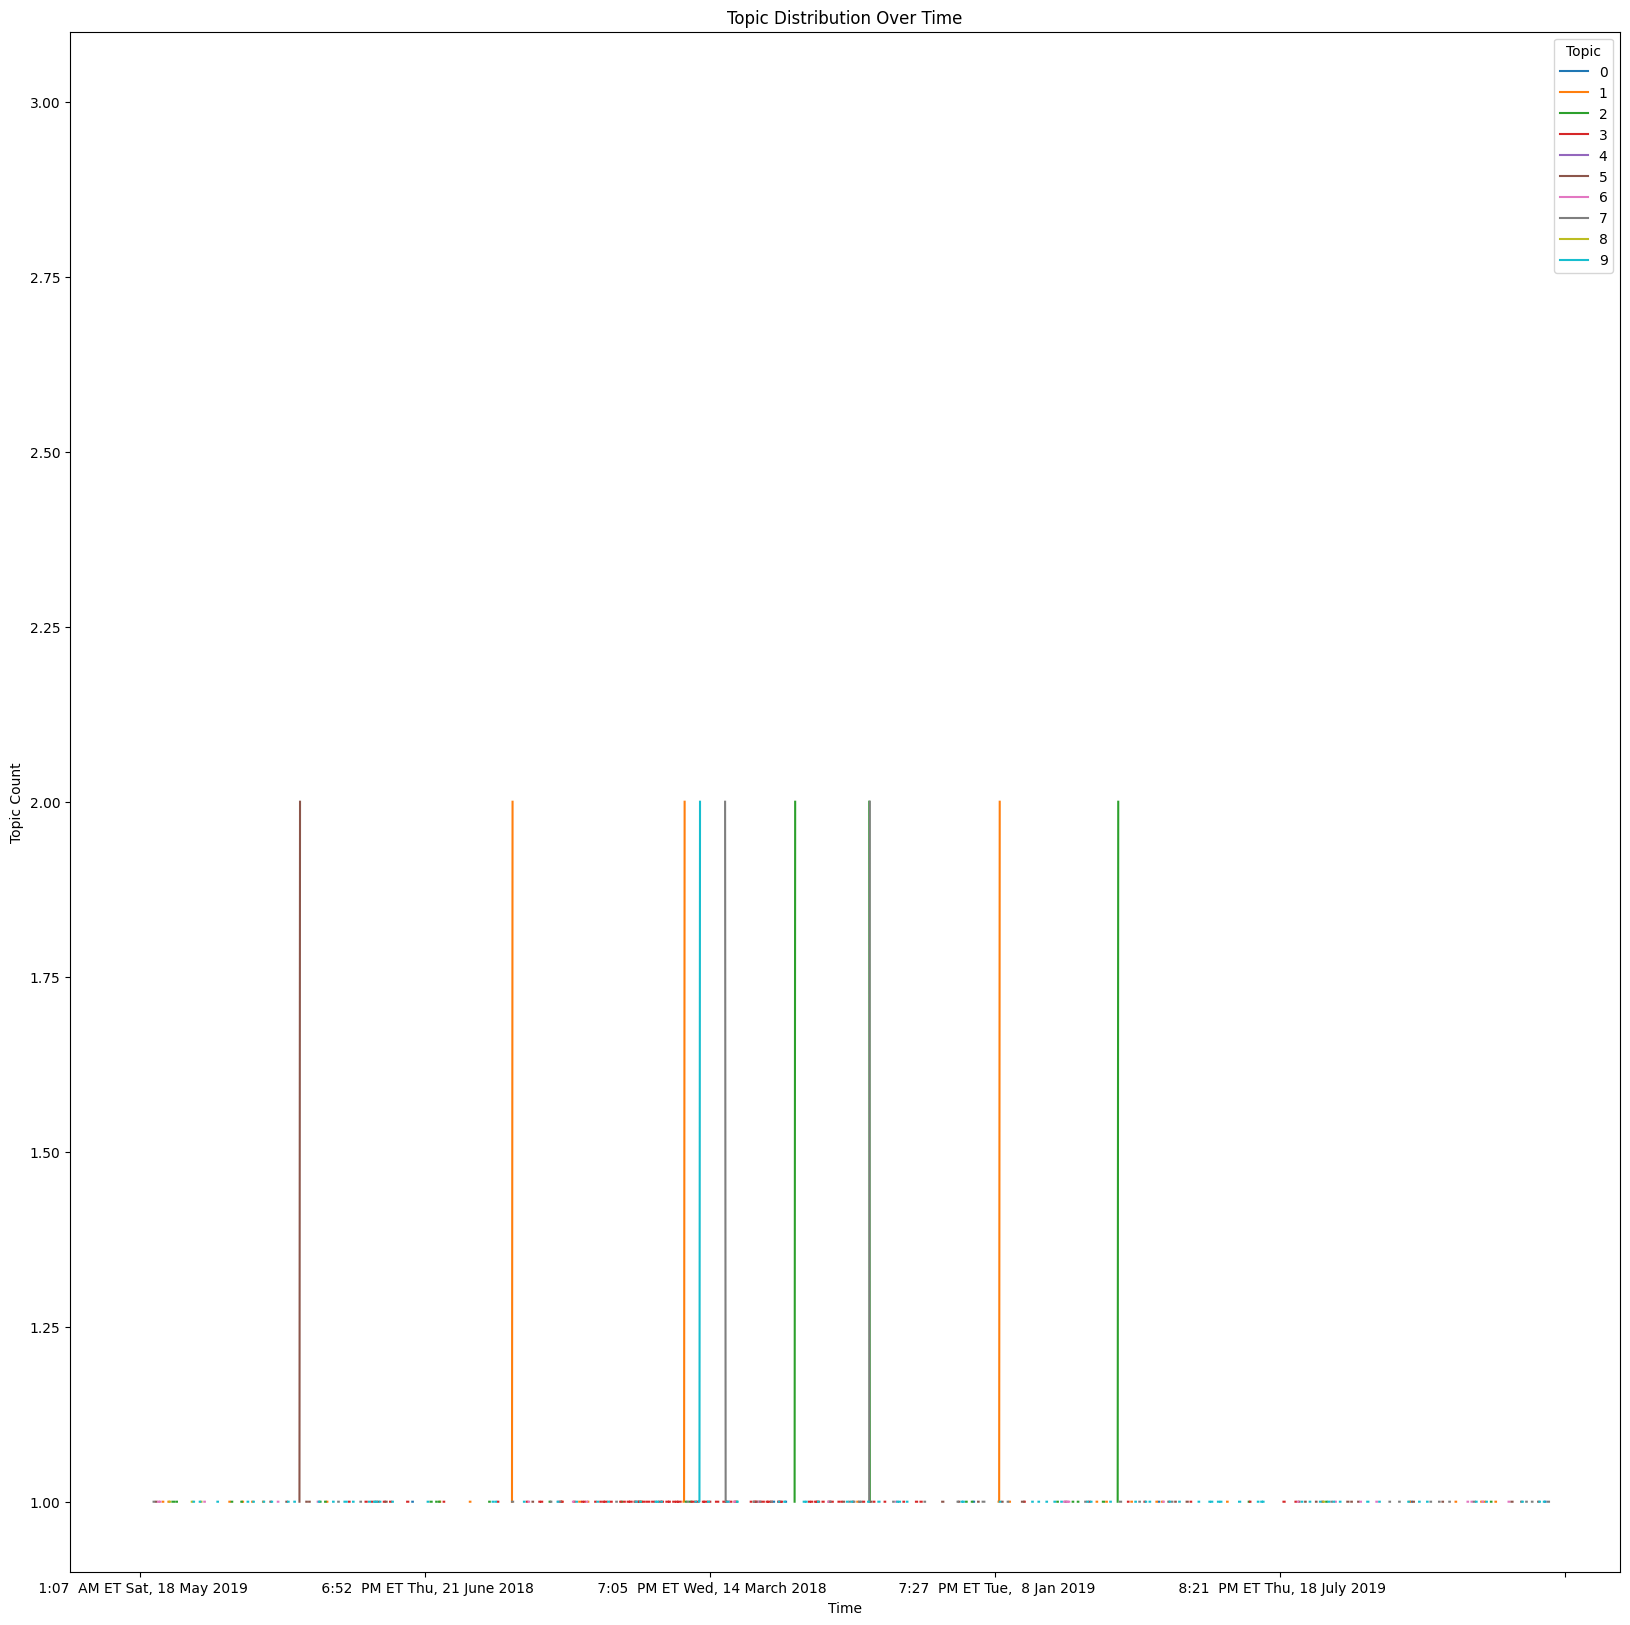

In [ ]:
# Plotting the topic proportions over time using a line graph
topic_counts.plot(kind='line', figsize=(20, 20))
plt.xlabel('Time')
plt.ylabel('Topic Count')
plt.title('Topic Distribution Over Time')
plt.legend(title='Topic', loc='upper right')
plt.show()

# Topic Distribution
To demonstrate the topic distribution, you can visualize the distribution of topics across the entire corpus or for specific documents.

1.   Topic Proportions for the Entire Corpus:






In [ ]:
# Get the topic proportions for the entire corpus
corpus_topic_proportions = lda_model.get_document_topics(doc_term_matrix, minimum_probability=0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average topic proportions for the entire corpus
average_topic_proportions = [sum(prob for _, prob in doc_topics) / len(doc_topics) for doc_topics in corpus_topic_proportions]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


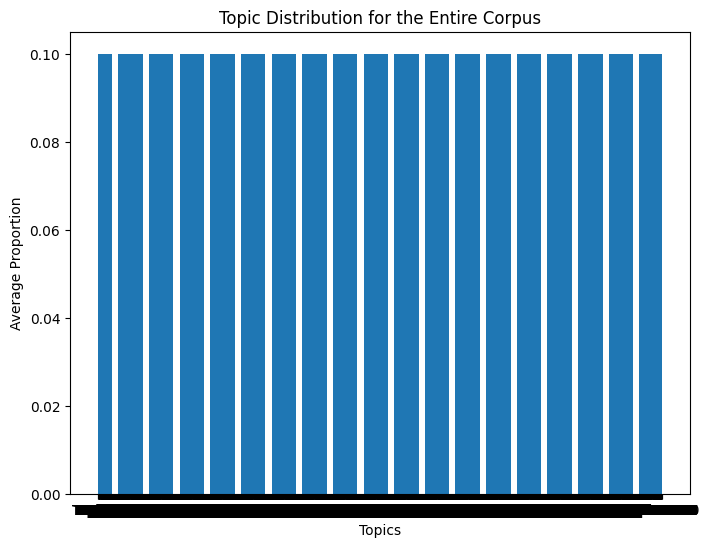

In [ ]:
# Plot the topic distribution
topic_labels = [f'Topic {i+1}' for i in range(len(average_topic_proportions))]
plt.figure(figsize=(8, 6))
plt.bar(topic_labels, average_topic_proportions)
plt.xlabel('Topics')
plt.ylabel('Average Proportion')
plt.title('Topic Distribution for the Entire Corpus')
plt.show()

In [ ]:
# Get the topic proportions for each document
document_topic_proportions = [lda_model.get_document_topics(doc_bow, minimum_probability=0) for doc_bow in doc_term_matrix]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


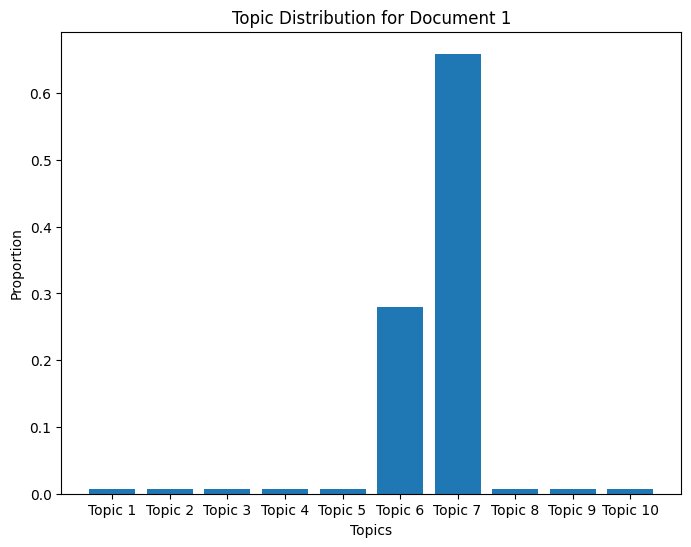

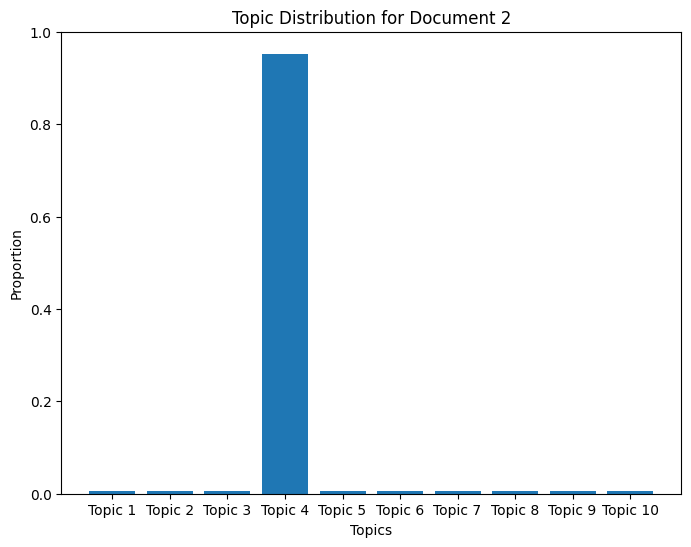

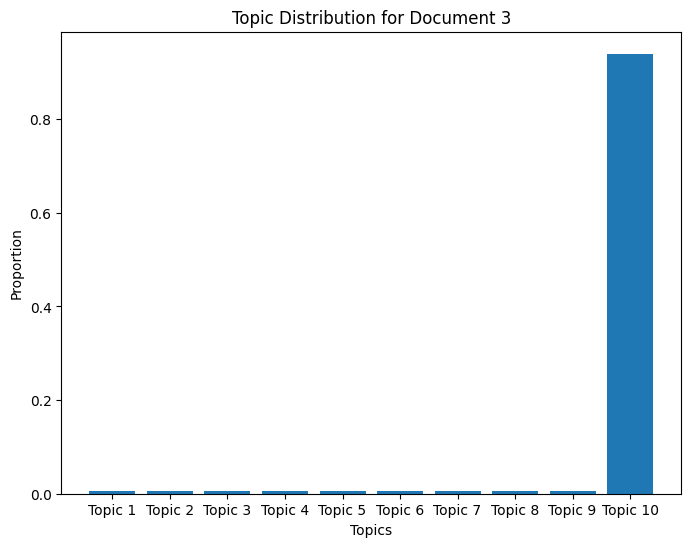

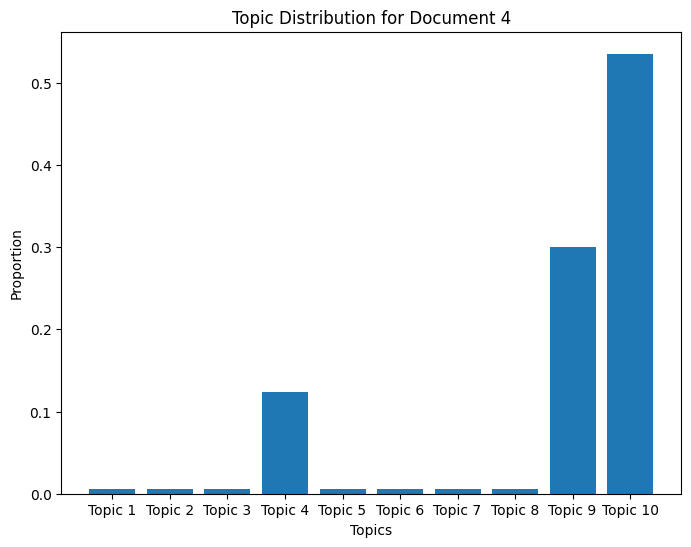

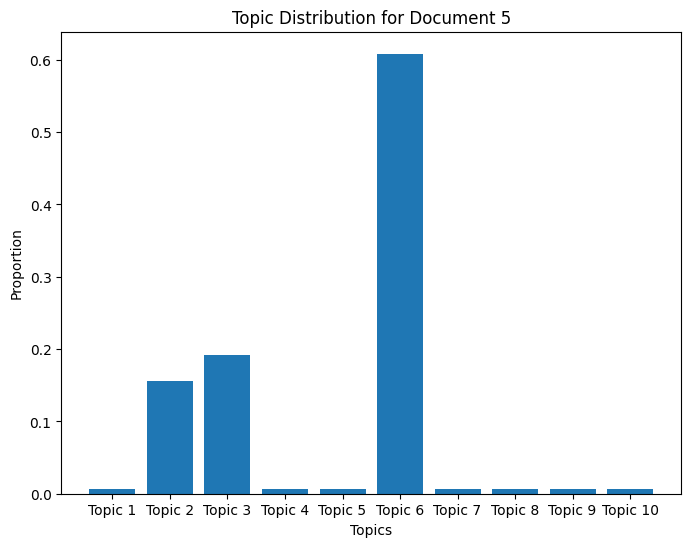

In [ ]:
# Plot the topic distribution for specific documents
num_documents_to_plot = 5  # You can change this to show the distribution for more or fewer documents
for i, doc_topics in enumerate(document_topic_proportions[:num_documents_to_plot]):
    topic_proportions = [prob for _, prob in doc_topics]
    topic_labels = [f'Topic {i+1}' for i in range(len(topic_proportions))]
    plt.figure(figsize=(8, 6))
    plt.bar(topic_labels, topic_proportions)
    plt.xlabel('Topics')
    plt.ylabel('Proportion')
    plt.title(f'Topic Distribution for Document {i+1}')
    plt.show()

#plot the most probable topic over a time series frequency table

1.    create a table that shows the frequency of each topic for each time period
2.   plot this table as a time series graph to visualize how the most probable topic changes over time



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Topic'] = most_probable_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group by 'Time' column and count the occurrences of each topic
time_topic_counts = data.groupby(['Time', 'Topic']).size().unstack()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the most probable topic for each time period
most_probable_topics = time_topic_counts.idxmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


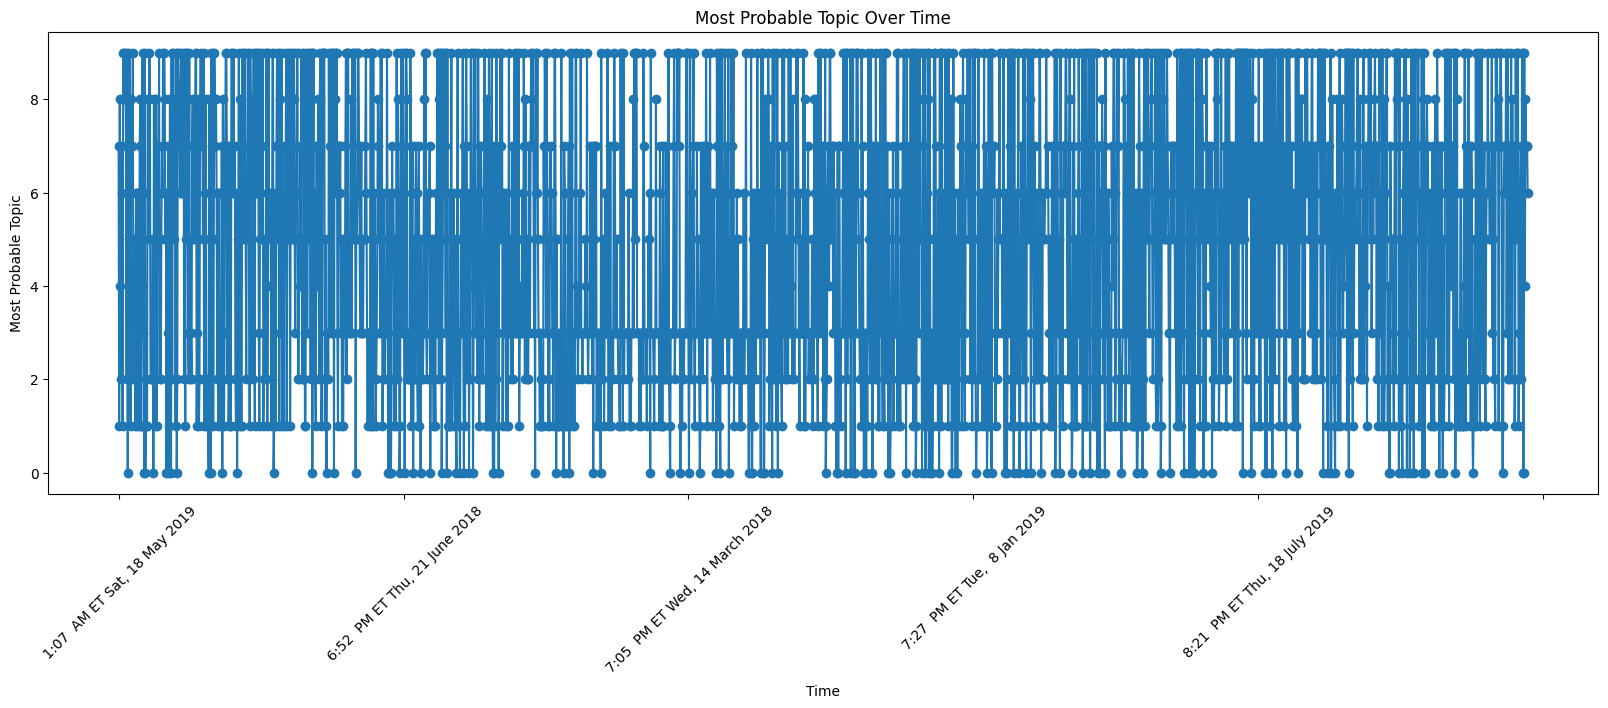

In [ ]:
# Plot the most probable topic over a time series
plt.figure(figsize=(20, 6))
most_probable_topics.plot(kind='line', marker='o')
plt.xlabel('Time')
plt.ylabel('Most Probable Topic')
plt.title('Most Probable Topic Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Get the top 10 most frequent topics
top_10_topics = most_probable_topics.value_counts().nlargest(10).index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter the DataFrame to include only the top 10 topics
top_10_time_topic_counts = time_topic_counts[top_10_topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x600 with 0 Axes>

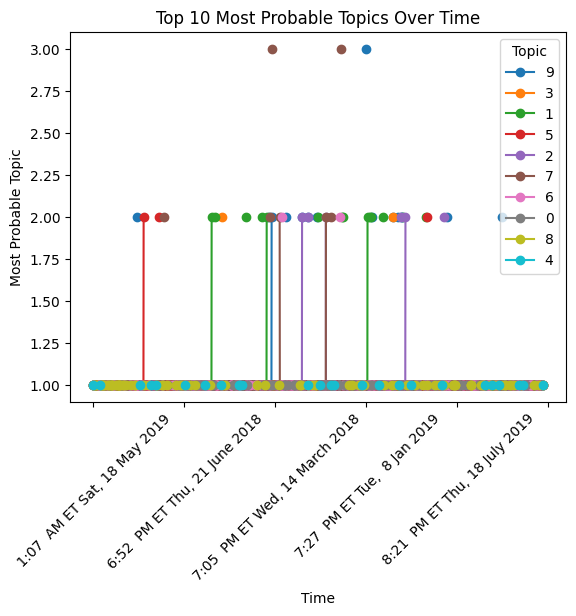

In [ ]:
# Plot the top 10 most probable topics over a time series
plt.figure(figsize=(10, 6))
top_10_time_topic_counts.plot(kind='line', marker='o')
plt.xlabel('Time')
plt.ylabel('Most Probable Topic')
plt.title('Top 10 Most Probable Topics Over Time')
plt.xticks(rotation=45)
plt.legend(title='Topic', loc='upper right')
plt.show()

In [ ]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter the DataFrame to include only the top 10 topics
top_10_time_topic_counts = time_topic_counts[top_10_topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


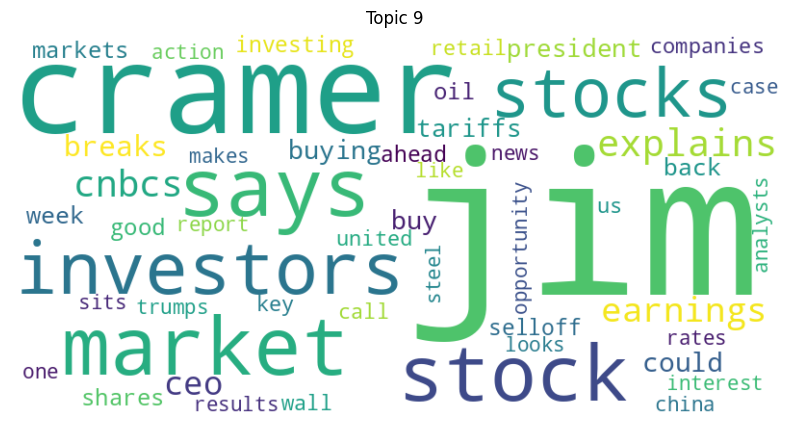

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


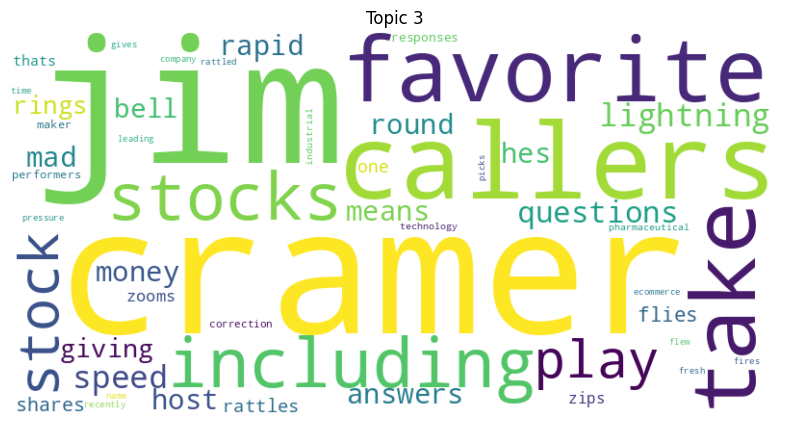

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


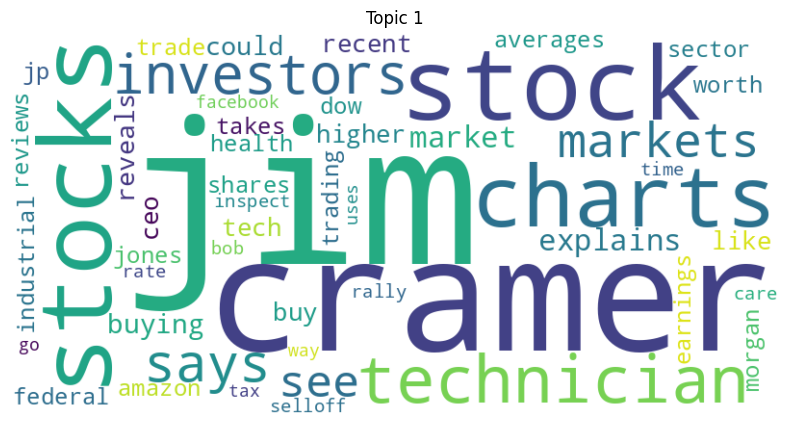

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


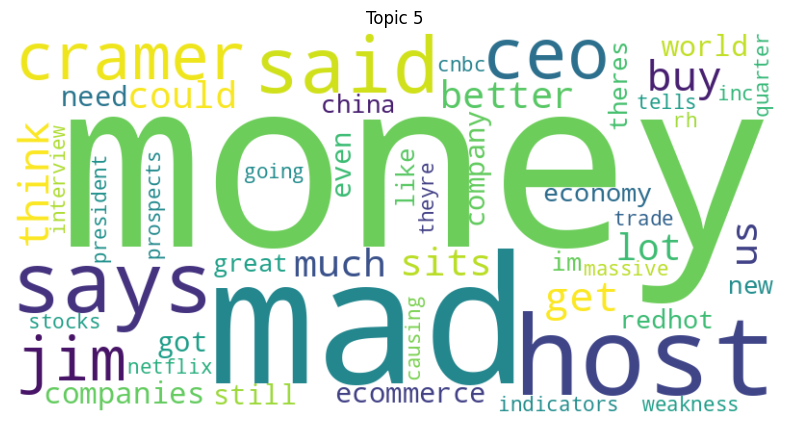

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


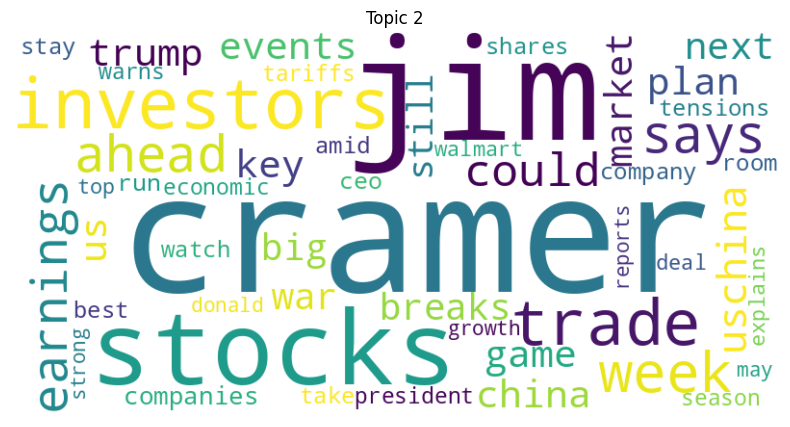

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


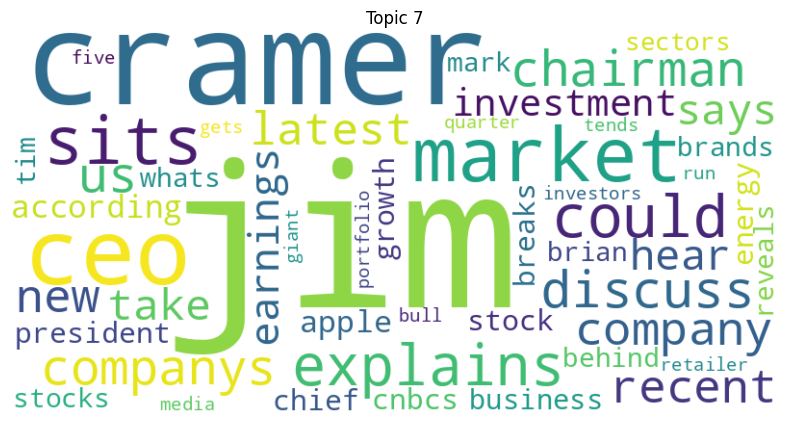

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


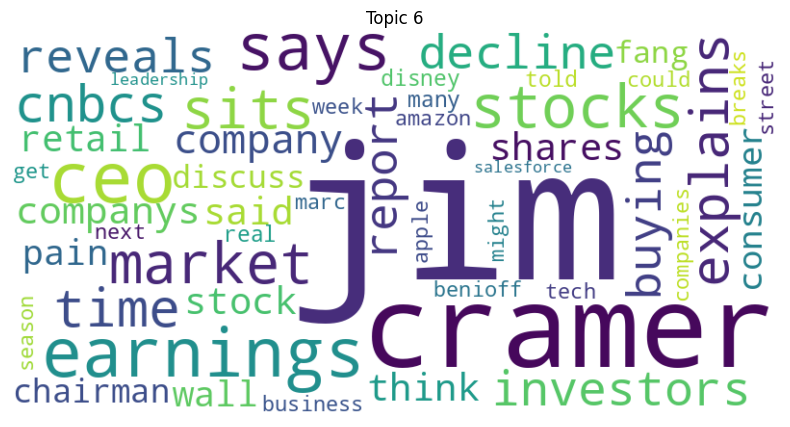

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


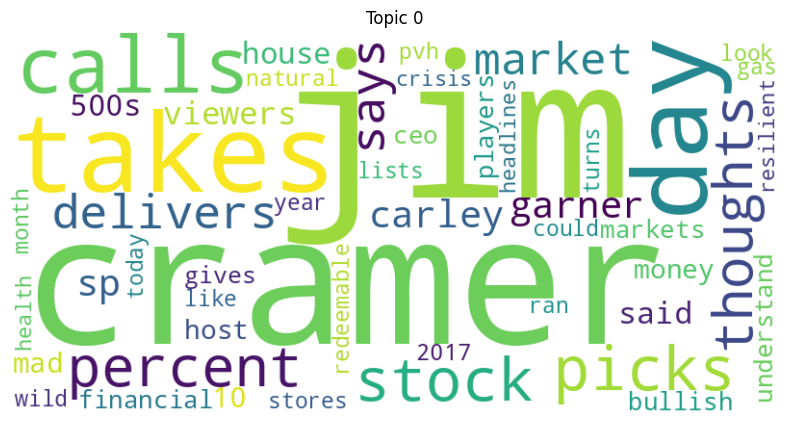

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


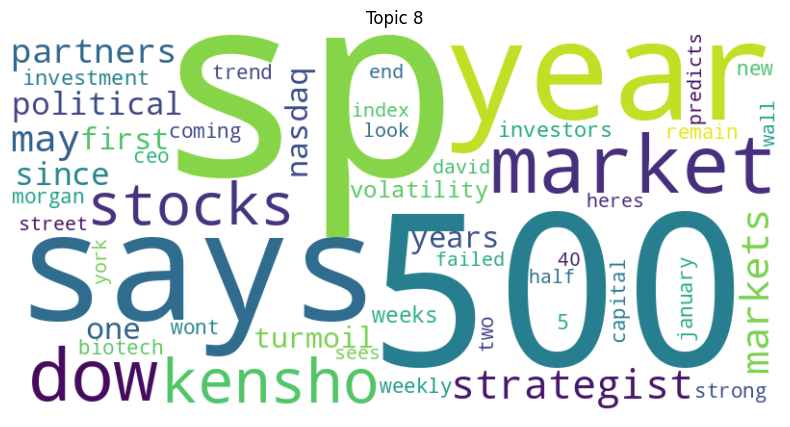

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


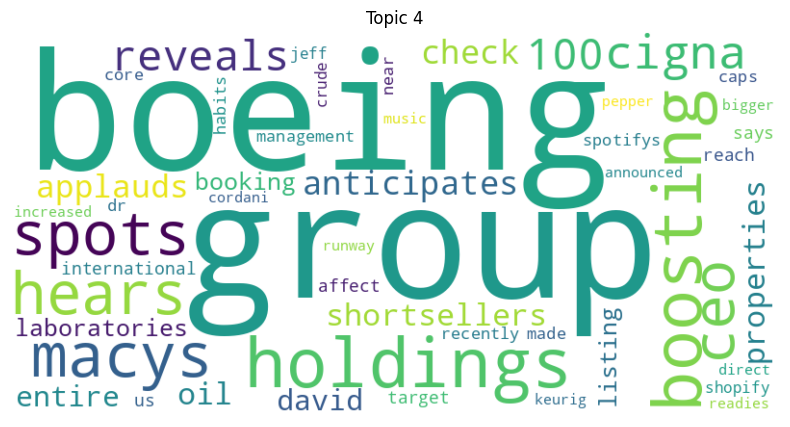

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame 'data' with 'Time' and 'Topic' columns
# data = pd.read_csv('your_data.csv')

# Group by 'Time' column and count the occurrences of each topic
time_topic_counts = data.groupby(['Time', 'Topic']).size().unstack()

# Find the most probable topic for each time period
most_probable_topics = time_topic_counts.idxmax(axis=1)

# Get the top 10 most frequent topics
top_10_topics = most_probable_topics.value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 topics
top_10_time_topic_counts = time_topic_counts[top_10_topics]

# Create word clouds for the top 10 most probable topics
for topic in top_10_topics:
    # Extract words and their probabilities for the current topic
    topic_words_probs = lda_model.show_topic(topic, topn=50)
    topic_words = [word for word, prob in topic_words_probs]
    topic_probs = [prob for word, prob in topic_words_probs]

    # Create a dictionary of words and their probabilities
    topic_word_probs = {word: prob for word, prob in zip(topic_words, topic_probs)}

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_word_probs)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic}')
    plt.show()


#Granger causality test

In [46]:
# Convert the DataFrame to time series format
time_series_data = pd.get_dummies(data.set_index('Time')['Topic'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
import warnings

warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as smapi
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with 'Time' and 'Topic' columns
# data = pd.read_csv('your_data.csv')

# Convert the DataFrame to time series format
time_series_data = pd.get_dummies(data.set_index('Time')['Topic'])

# Perform Granger causality test
max_lag = 3  # Set the maximum lag for the test (you can adjust this as needed)

# Create the VAR model
model = smapi.tsa.arima.ARIMA(time_series_data)

# Select the optimal lag order based on AIC (you can use 'bic' or 'hqic' as well)
lag_order = model.select_order(max_lag, ic='aic')

# Perform the Granger causality test with the selected lag order
gc_results = grangercausalitytests(time_series_data, lag_order.selected_orders['aic'], verbose=True)

# Plot Granger causality p-values over time
plt.figure(figsize=(10, 6))
for lag in range(1, lag_order.selected_orders['aic'] + 1):
    p_values = []
    for topic in time_series_data.columns:
        p_value = gc_results[lag][0][f'{topic}_x_{topic}'][1]
        p_values.append(p_value)
    plt.plot(time_series_data.index[lag:], p_values, label=f'Lag {lag}')

plt.xlabel('Time')
plt.ylabel('Granger Causality P-Value')
plt.title('Granger Causality Test Results')
plt.legend(title='Lag', loc='upper right')
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()


ValueError: ignored